Dataset came from Kaggle => https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction?select=movies.csv

In [1]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_rows', None)

In [2]:
filename = './movies.csv'
movies_df = pd.read_csv(filename)
movies_df.info()
movies_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


Initial Observations: <br>
1. There are many missing/null values in the Year, Genre, Rating, Votes, Runtime, Gross
2. Year and Gross should be an integer. However, Year has ranges and need to determine what to do about them
3. May of the columns have "\n" and need to remove that


In [3]:
# copy of original  dataset
movies_df2 = movies_df.copy()

In [4]:
movies_df.columns = ['Movies', 'Year', 'Genre', 'Rating', 'One-line', 'Stars', 'Votes', 'Runtime', 'Gross']

In [5]:
movies_df.columns

Index(['Movies', 'Year', 'Genre', 'Rating', 'One-line', 'Stars', 'Votes',
       'Runtime', 'Gross'],
      dtype='object')

In [6]:
movies_df.duplicated().sum()
# 431 duplicates


431

In [7]:
movies_df = movies_df.drop_duplicates()
movies_df.duplicated().sum()

0

In [8]:
# checking null values
missing_values_count= movies_df.isna().sum()
missing_values_count

Movies         0
Year         542
Genre         78
Rating      1400
One-line       0
Stars          0
Votes       1400
Runtime     2560
Gross       9108
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem: <br>
Resource: https://www.kaggle.com/code/alexisbcook/handling-missing-values gave me the inspiration to determine the percentage of missed values

In [9]:
# how many total missing values do we have?
total_cells = np.product(movies_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f"There is {percent_missing.round(decimals=2)}% missing data" )

There is 17.52% missing data


<Axes: >

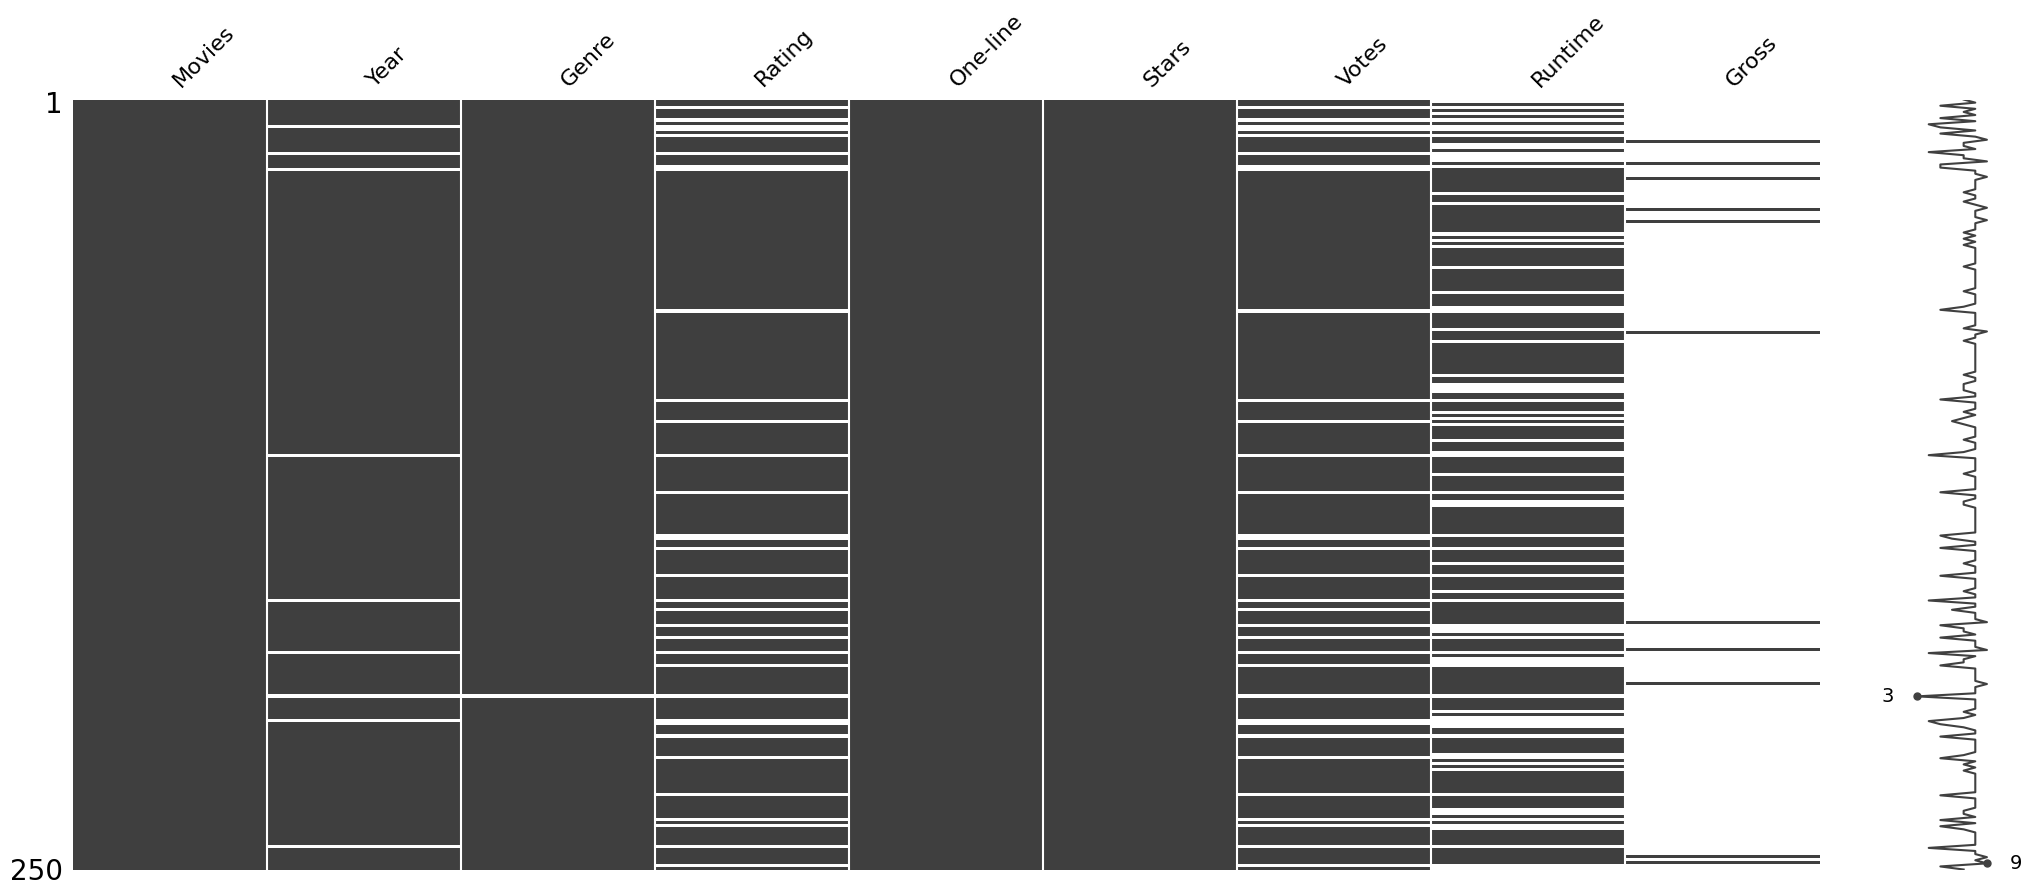

In [10]:
# visual missind data
import missingno as msno
%matplotlib inline
msno.matrix(movies_df.sample(250))

In [11]:

def check_df_null_percentage(df):
    missing_values_count= df.isna().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing/total_cells) * 100
    total_rows = df.shape[0]
    # created percentage null checks for each row 
    for col in df:
        series = df[col]
        each_series_null_values = series.isna().sum()
        percentage_each_series = (each_series_null_values/total_rows) * 100
        percentage_each_series_df  = (each_series_null_values/total_cells) * 100
        text = (
            f'''Series column {col} has {each_series_null_values} missing values which is 
            {percentage_each_series.round(decimals=2)} % of row data or 
            {percentage_each_series_df.round(decimals=2)} of the whole dataset'''
        )
        print(text)
    print(f"There is {percent_missing.round(decimals=2)}% missing data in your dataset" )
    

Created function to check the percentage of missed data 

In [12]:
check_df_null_percentage(movies_df)

Series column Movies has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Year has 542 missing values which is 
            5.66 % of row data or 
            0.63 of the whole dataset
Series column Genre has 78 missing values which is 
            0.82 % of row data or 
            0.09 of the whole dataset
Series column Rating has 1400 missing values which is 
            14.63 % of row data or 
            1.63 of the whole dataset
Series column One-line has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Stars has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Votes has 1400 missing values which is 
            14.63 % of row data or 
            1.63 of the whole dataset
Series column Runtime has 2560 missing values which is 
            26.76 % of row data or 
            2.97 of the whole d

Columns to Keep --> <br/> Movies, 
Columns to Drop rows/columns --> <br/> Genre rows, Gross column
Columns to Fill in --> <br/> Year, Rating, Votes, Runtime


In [13]:
movies_df = movies_df.drop('Gross', axis = 1)




In [14]:
# movies_df= movies_df.dropna(axis = 0, how = 'all')
movies_df.dropna(axis=0, how="any", subset=['Genre'], inplace=True)

In [15]:
movies_df.isna().sum()

Movies         0
Year         501
Genre          0
Rating      1333
One-line       0
Stars          0
Votes       1333
Runtime     2491
dtype: int64

https://gist.github.com/smram/d6ded3c9028272360eb65bcab564a18a

https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells

https://regexr.com/3fkiv

https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/


In [16]:
def cleanStringData(df):
    df = df.replace(r'\r+|\n+|\t+|\(+|\)+|','', regex=True)
    new_df = pd.DataFrame()
    for col in df:
        series = df[col]
        # check column data type
        if series.dtype == 'object':
            series = series.str.strip() #removes leading and trailing spaces
            # series = series.str.replace(" ", "") #this removes all spaces 
            new_df[col] = series
        else:
            new_df[col] = series
    return new_df

Visualizes Missed Data: https://github.com/ResidentMario/missingno

In [17]:
movies_df = cleanStringData(movies_df)
movies_df.head()

,Movies,Year,Genre,Rating,One-line,Stars,Votes,Runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN


Need to remove commas from Votes and concatenate "-present" to Year

In [18]:
# removing the commas from this series
movies_df['Votes'] = movies_df['Votes'].str.replace(',','')

movies_df['Votes'].head()

0     21062
1     17870
2    885805
3    414849
4       NaN
Name: Votes, dtype: object

It appears that they are letters mixed up with this column and need to get rid of them 


In [19]:
# movies_df['Year'] = movies_df['Year'].str.replace(r'\D+[a-z\%\$\#\@\!\-\_]', '', regex=True)
# - – — (hyphen differences)

movies_df['Year'] = movies_df['Year'].str.replace(r'[a-zA-Z]', '', regex=True)
# https://automatetheboringstuff.com/2e/chapter7/
# – this is an en dash (mac option + hyphen/dash) and different from a regular dash
movies_df['Year'] = movies_df['Year'].str.replace(r'[^0-9]$', '–present', regex=True)

movies_df['Year'].unique()

array(['2021', '2021–present', '2010–2022', '2013–present',
       '2020–present', '2006–2013', '2019–present', '2016–2021',
       '2011–present', '2005–present', '2008–2013', '2017–present',
       '2017–2021', '2016–present', '1994–2004', '2014–present',
       '2013–2020', '2015–present', '2005–2020', '2013–2022',
       '2003–present', '2009–2020', ' 2018–present', '2010–2015',
       '2011–2019', '2015–2020', '2005–2014', '2009–2015', '2008–2014',
       '2016–2018', '2009–2017', '2020', '2018–2021', '2017–2020',
       '1987–1994', '2018–present', '2012–present', '2014–2020',
       '2011–2018', '2005–2017', '2017', '2007–2015', '2000–2007',
       ' 2007–present', '1993', '1999–2022', '2015–2018', '2014–2019',
       '2016', '2012–2020', '2013–2019', '2007–2012', '2011–2020',
       '2010–2017', '2000–2015', '2015–2021', '2001', '1997–present',
       '2011–2017', '1993–1999', '1989–1998', '2010–2013', '2010–2020',
       '2003–2019', ' 2019', '2017–2019', '1975', '2005–2008',


In [20]:
movies_df['Year'] =  movies_df['Year'].str.replace(" ", "")

movies_df['Year'].unique()

array(['2021', '2021–present', '2010–2022', '2013–present',
       '2020–present', '2006–2013', '2019–present', '2016–2021',
       '2011–present', '2005–present', '2008–2013', '2017–present',
       '2017–2021', '2016–present', '1994–2004', '2014–present',
       '2013–2020', '2015–present', '2005–2020', '2013–2022',
       '2003–present', '2009–2020', '2018–present', '2010–2015',
       '2011–2019', '2015–2020', '2005–2014', '2009–2015', '2008–2014',
       '2016–2018', '2009–2017', '2020', '2018–2021', '2017–2020',
       '1987–1994', '2012–present', '2014–2020', '2011–2018', '2005–2017',
       '2017', '2007–2015', '2000–2007', '2007–present', '1993',
       '1999–2022', '2015–2018', '2014–2019', '2016', '2012–2020',
       '2013–2019', '2007–2012', '2011–2020', '2010–2017', '2000–2015',
       '2015–2021', '2001', '1997–present', '2011–2017', '1993–1999',
       '1989–1998', '2010–2013', '2010–2020', '2003–2019', '2019',
       '2017–2019', '1975', '2005–2008', '1995–2001', '2006'

In [25]:
# removes extra spaces and replaces them with one space
movies_df['Stars'] = movies_df['Stars'].str.replace(r'\s+', ' ', regex=True)
movies_df['Stars'].unique()

array(['Director:Peter Thorwarth| Stars:Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti',
       'Stars:Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill',
       'Stars:Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan',
       ..., 'Director:Orlando von Einsiedel| Star:Prince Harry',
       'Director:Jovanka Vuckovic| Stars:Morgan Taylor Campbell, Iñaki Godoy, Rhianna Jagpal, Siddhartha Minhas',
       'Director:Jovanka Vuckovic| Stars:Morgan Taylor Campbell, Jennifer Cheon Garcia, Iñaki Godoy, Rhianna Jagpal'],
      dtype=object)

In [26]:
# getting the median values
median_rating = movies_df['Rating'].median()
median_voting = movies_df['Votes'].median()
median_runtime = movies_df['Runtime'].median()
# filling daa
movies_df['Rating'].fillna(median_rating, inplace=True)
movies_df['Votes'].fillna(median_voting, inplace=True)
movies_df['Runtime'].fillna(median_runtime, inplace=True)
movies_df['Year'].fillna('Missing', inplace=True)

# converting data types
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'])
movies_df['Votes'] = movies_df['Votes'].astype(int)
movies_df['Runtime'] = movies_df['Runtime'].astype(int)

In [27]:
movies_df.dtypes

Movies       object
Year         object
Genre        object
Rating      float64
One-line     object
Stars        object
Votes         int64
Runtime       int64
dtype: object

In [28]:
check_df_null_percentage(movies_df)

Series column Movies has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Year has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Genre has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Rating has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column One-line has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Stars has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Votes has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Runtime has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
There is 0.0% miss

In [29]:
shows_filter = movies_df['Runtime'] <= 60
movies_df[shows_filter].head(20)

,Movies,Year,Genre,Rating,One-line,Stars,Votes,Runtime
1,Masters of the Universe: Revelation,2021–present,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870,25
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805,44
3,Rick and Morty,2013–present,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849,23
4,Army of Thieves,2021,"Action, Crime, Horror",7.1,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matthias...,796,60
5,Outer Banks,2020–present,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...",25858,50
7,Dexter,2006–2013,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars:Michael C. Hall, Jennifer Carpenter, Dav...",665387,53
8,Never Have I Ever,2020–present,Comedy,7.9,The complicated life of a modern-day first gen...,"Stars:Maitreyi Ramakrishnan, Poorna Jagannatha...",34530,30
9,Virgin River,2019–present,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","Stars:Alexandra Breckenridge, Martin Henderson...",27279,44
11,Lucifer,2016–2021,"Crime, Drama, Fantasy",8.1,Lucifer Morningstar has decided he's had enoug...,"Stars:Tom Ellis, Lesley-Ann Brandt, Lauren Ger...",264222,42
13,Sex/Life,2021–present,"Comedy, Drama, Romance",5.4,A suburban mother of two takes a fantasy-charg...,"Stars:Sarah Shahi, Mike Vogel, Adam Demos, Mar...",12172,60


In [30]:
movie_filter = movies_df['Runtime'] > 60
movies_df[movie_filter].head(20)

,Movies,Year,Genre,Rating,One-line,Stars,Votes,Runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baumeiste...,21062,121
6,The Last Letter from Your Lover,2021,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,Director:Augustine Frizzell| Stars:Shailene Wo...,5283,110
10,Gunpowder Milkshake,2021,"Action, Adventure, Thriller",6.0,Three generations of women fight back against ...,"Director:Navot Papushado| Stars:Karen Gillan, ...",17989,114
12,Fear Street: 1994,2021,"Drama, Horror, Mystery",6.2,A circle of teenage friends accidentally encou...,"Director:Leigh Janiak| Stars:Kiana Madeira, Ol...",50148,107
20,Fear Street: 1978,2021,"Drama, Horror, Mystery",6.8,"Shadyside, 1978. School's out for summer and t...","Director:Leigh Janiak| Stars:Sadie Sink, Emily...",36634,109
25,Chernobyl,2021,"Drama, History, Romance",5.0,A story about a heroic fireman who worked as o...,Director:Danila Kozlovskiy| Stars:Danila Kozlo...,4681,136
30,Fear Street: 1666,2021,"Horror, Mystery",6.7,The origins of Sarah Fier's curse are finally ...,"Director:Leigh Janiak| Stars:Kiana Madeira, As...",27447,114
41,La casa de papel,2017–2021,"Action, Crime, Mystery",8.3,An unusual group of robbers attempt to carry o...,"Stars:Úrsula Corberó, Álvaro Morte, Itziar Itu...",341858,70
43,Outlander,2014–present,"Drama, Fantasy, Romance",8.4,An English combat nurse from 1945 is mysteriou...,"Stars:Caitriona Balfe, Sam Heughan, Duncan Lac...",134991,64
49,Army of the Dead,2021,"Action, Crime, Horror",5.8,"Following a zombie outbreak in Las Vegas, a gr...","Director:Zack Snyder| Stars:Dave Bautista, Ell...",132378,148


In [32]:
filtered_hyphen = movies_df['Year'].str.contains('–')
movies_df[filtered_hyphen].head(20)



,Movies,Year,Genre,Rating,One-line,Stars,Votes,Runtime
1,Masters of the Universe: Revelation,2021–present,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870,25
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805,44
3,Rick and Morty,2013–present,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849,23
5,Outer Banks,2020–present,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...",25858,50
7,Dexter,2006–2013,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars:Michael C. Hall, Jennifer Carpenter, Dav...",665387,53
8,Never Have I Ever,2020–present,Comedy,7.9,The complicated life of a modern-day first gen...,"Stars:Maitreyi Ramakrishnan, Poorna Jagannatha...",34530,30
9,Virgin River,2019–present,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","Stars:Alexandra Breckenridge, Martin Henderson...",27279,44
11,Lucifer,2016–2021,"Crime, Drama, Fantasy",8.1,Lucifer Morningstar has decided he's had enoug...,"Stars:Tom Ellis, Lesley-Ann Brandt, Lauren Ger...",264222,42
13,Sex/Life,2021–present,"Comedy, Drama, Romance",5.4,A suburban mother of two takes a fantasy-charg...,"Stars:Sarah Shahi, Mike Vogel, Adam Demos, Mar...",12172,60
14,American Horror Story,2011–present,"Drama, Horror, Thriller",8.0,An anthology series centering on different cha...,"Stars:Lady Gaga, Kathy Bates, Angela Bassett, ...",286488,60


In [33]:

# create a new column - How many years since release?
# if it contains hyphen we want to subtract from current year of 2023
# if it contain 2 numbers subtract them
# if it doesn't we want to put the year made
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

movies_df['Type'] = np.where(movies_df['Year'].str.contains('–') == True, 'TV Show', 'Movie')
movies_df.head(10)

    

    

,Movies,Year,Genre,Rating,One-line,Stars,Votes,Runtime,Type
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baumeiste...,21062,121,Movie
1,Masters of the Universe: Revelation,2021–present,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870,25,TV Show
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805,44,TV Show
3,Rick and Morty,2013–present,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849,23,TV Show
4,Army of Thieves,2021,"Action, Crime, Horror",7.1,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matthias...,796,60,Movie
5,Outer Banks,2020–present,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cline, Madison Bai...",25858,50,TV Show
6,The Last Letter from Your Lover,2021,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,Director:Augustine Frizzell| Stars:Shailene Wo...,5283,110,Movie
7,Dexter,2006–2013,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars:Michael C. Hall, Jennifer Carpenter, Dav...",665387,53,TV Show
8,Never Have I Ever,2020–present,Comedy,7.9,The complicated life of a modern-day first gen...,"Stars:Maitreyi Ramakrishnan, Poorna Jagannatha...",34530,30,TV Show
9,Virgin River,2019–present,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","Stars:Alexandra Breckenridge, Martin Henderson...",27279,44,TV Show


In [36]:
# checking for any correlations for numeric values
movies_df.corr()

/var/folders/q_/xgz69vs10773zsylsjzpqghm0000gp/T/ipykernel_61949/520736653.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_df.corr()


,Rating,Votes,Runtime
Rating,1.000000,0.099125,-0.217852
Votes,0.099125,1.000000,0.153843
Runtime,-0.217852,0.153843,1.000000


In [37]:
# checking to see if if the column with the correct values created successfully
movies_df.loc[:, ['Year' , 'Type']].head(50)

,Year,Type
0,2021,Movie
1,2021–present,TV Show
2,2010–2022,TV Show
3,2013–present,TV Show
4,2021,Movie
5,2020–present,TV Show
6,2021,Movie
7,2006–2013,TV Show
8,2020–present,TV Show
9,2019–present,TV Show


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Type'>

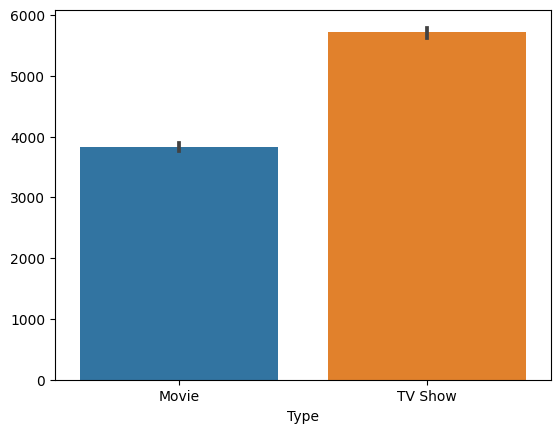

In [58]:

sns.barplot(x='Type', y=movies_df.index, data=movies_df)

/var/folders/q_/xgz69vs10773zsylsjzpqghm0000gp/T/ipykernel_5868/1993296606.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


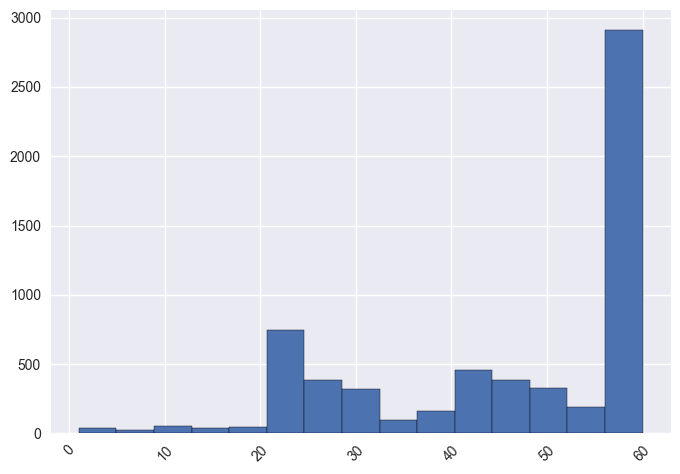

In [65]:
plt.style.use('seaborn')
movies_df.loc[shows_filter, 'Runtime'].hist(bins= 15, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain');

/var/folders/q_/xgz69vs10773zsylsjzpqghm0000gp/T/ipykernel_5868/372806189.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


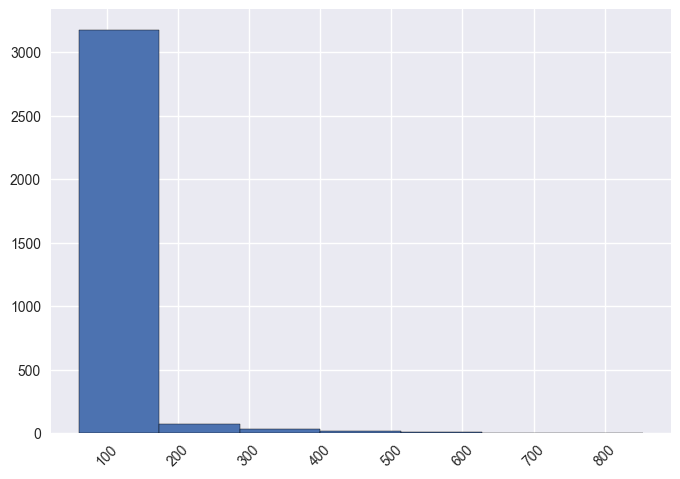

In [67]:
plt.style.use('seaborn')
movies_df.loc[movie_filter, 'Runtime'].hist(bins= 7, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain');

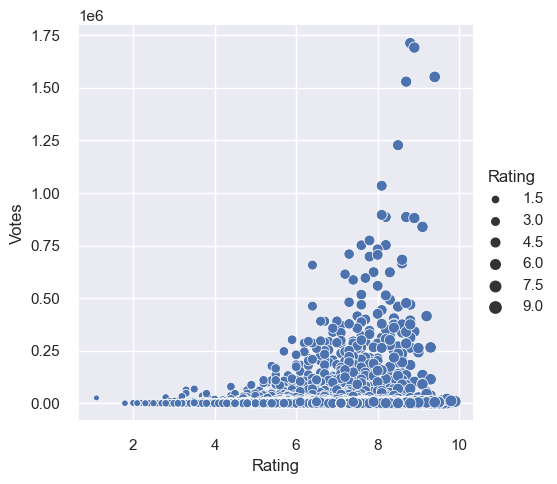

In [91]:
sns.relplot(data=movies_df, x="Rating", y='Votes',  size='Rating')

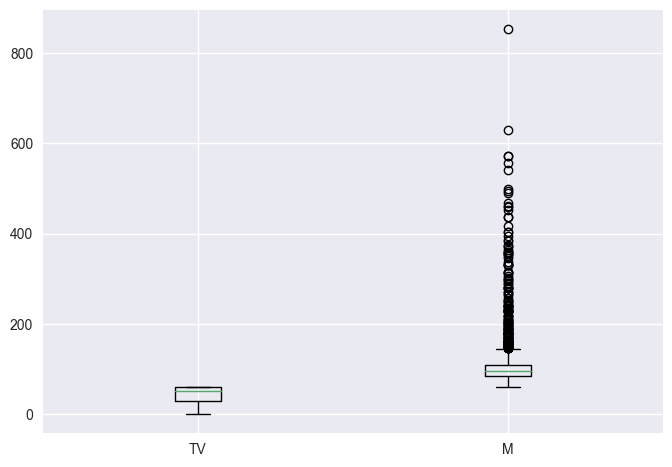

In [73]:


tv_shows_values= movies_df.loc[shows_filter, 'Runtime'].values
movie_values = movies_df.loc[movie_filter, 'Runtime'].values
plt.boxplot([tv_shows_values, movie_values], labels=['TV', 'M']);
# this would not be a good graph to plot this type of data with


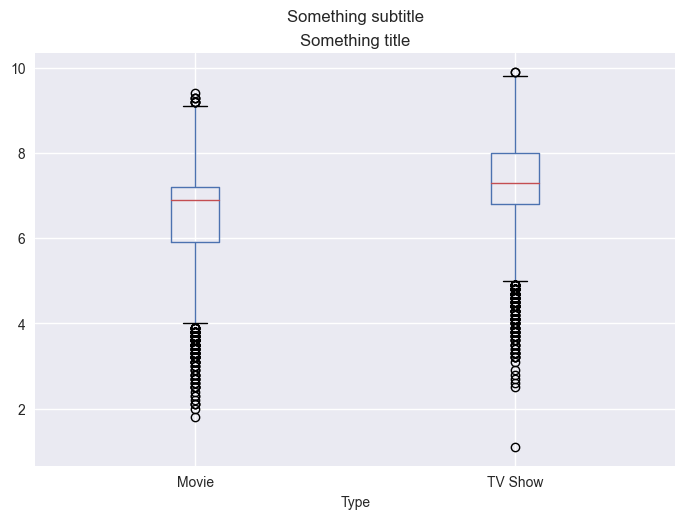

In [82]:
movies_df.boxplot(column='Rating', by = 'Type')
plt.title('Something title');
plt.suptitle('Something subtitle');
# this is also not a good graph for this type of data

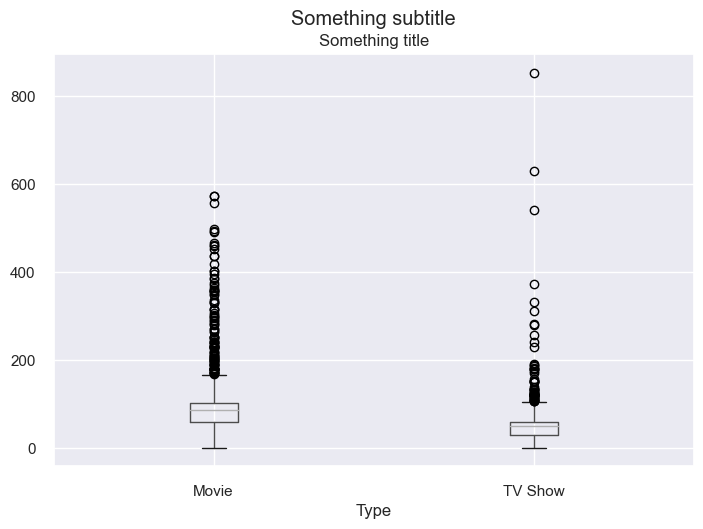